# Part I

a) The research question my analysis is investigating is: Can we use a time series model to accurately forecast future revenue?

b) The objective of this analysis is to convert daily revenue to a time-series model to gain insight in order to forecast future revenue.

# Part II

a) One assumption of a time series model is stationarity, that is to say the mean and variance are consistent over time (Wu, 2021). Another assumption is that has no autocorrelation, or autocorrelation close to zero (Dotis, 2019).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#uploading the csv

churn = pd.read_csv(r'C:\Users\abram\Downloads\teleco_time_series .csv')
print(churn.head())

   Day   Revenue
0    1  0.000000
1    2  0.000793
2    3  0.825542
3    4  0.320332
4    5  1.082554


In [2]:
churn.shape

(731, 2)

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [4]:
churn.describe()

,Day,Revenue
count,731.000000,731.000000
mean,366.000000,9.822901
std,211.165812,3.852645
min,1.000000,0.000000
25%,183.500000,6.872836
50%,366.000000,10.785571
75%,548.500000,12.566911
max,731.000000,18.154769


In [5]:
import datetime

start_date = pd.to_datetime('2022-2-1')
churn['Date'] = start_date + pd.to_timedelta(churn['Day'] - 1, unit='D')

# Drop the 'Day' column
churn.drop('Day', axis=1, inplace=True)

# With datetime column established, set this as index
churn.set_index('Date', inplace=True)

# Visually inspect final dataframe to verify appearance as expected
print(churn.head())
print(churn.tail())

             Revenue
Date                
2022-02-01  0.000000
2022-02-02  0.000793
2022-02-03  0.825542
2022-02-04  0.320332
2022-02-05  1.082554
              Revenue
Date                 
2024-01-28  16.931559
2024-01-29  17.490666
2024-01-30  16.803638
2024-01-31  16.194813
2024-02-01  16.620798


# Part C

C-1. See the figure below

C-2. The time step formatting can be seen above, in box # 5. Converting the Day column into a datetime series allows for more manipulation and aggregation of the data. There appear to be no gaps in measurement, and the length of the sequence is 731 data points, representing two years and a day, or a leap year . As there was no reference in the data dictionary as to when this data was from, I arbitrarily picked a starting data of 2-01-2022, with the series ending at 2-01-2024.

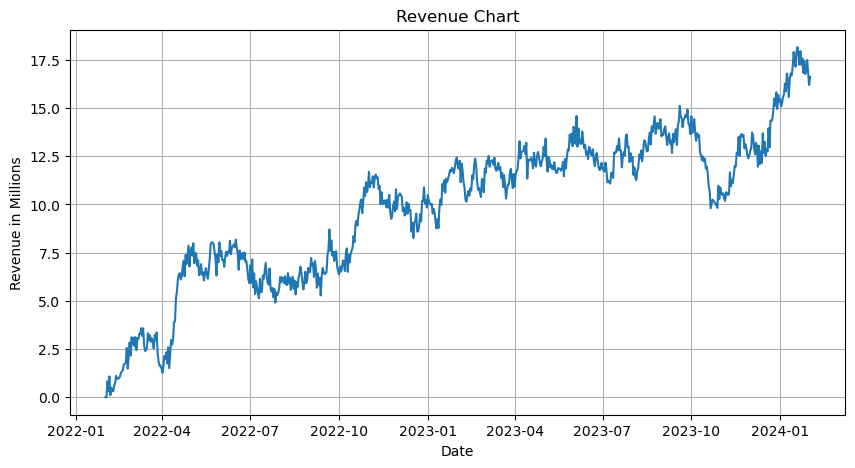

In [6]:
plt.figure(figsize=(10,5))
plt.plot(churn.Revenue)
plt.title('Revenue Chart')
plt.xlabel('Date') 
plt.ylabel ('Revenue in Millions')
plt.grid(True)
plt.show()

In [7]:
churn.isnull().any()

Revenue    False
dtype: bool

In [8]:
churn.to_csv(r'C:\Users\abram\Downloads\cleanedd213_1.csv',encoding='utf-8')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\abram\\Downloads\\cleanedd213_1.csv'

In [9]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(churn['Revenue'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -3.2468547430907115
P-Value: 0.07546306916945765
Number of lags: 1
Number of observations: 729
Critical Values: {'1%': -3.9712423570933804, '5%': -3.416529616517029, '10%': -3.1306042197526884}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


# C-3: Evaluation of Stationarity

Based on the Revenue Chart, we can clearly see that the data has a strong positive trend, and can therefore rule  out stationarity. To further evaluate, I performed the ad fuller test, which has the null hypothesis that the series is not stationary. As you can see above, the p-value was not significantly low enough, and we therefore must accept the null hypothesis that the series is not stationary.

# C-4: Data Analysis steps

The steps required to complete the data analysis were as follows:

- The "Day" column needs to be converted to a proper DateTime
- The fixed "Day" column needs to be turned into the index of the datetime series
- The "Revenue" data needs to be transformed into a stationary time series
- The data needs to be separated into training and test sets

I performed the first two bulleted points above in output box 5.

In order to transform the series into on that is stationary, I created a dataframe that was the first difference of the original dataframe, dropping na to account for the first data point in the series where there would be no difference. You can see below the transformation with the subsequent adfuller test for stationarity

In [10]:
#Transform the dataset by taking the first difference to check for stationarity
churn_diff=churn.diff().dropna()
adftest = adfuller(churn_diff['Revenue'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -44.86044546756166
P-Value: 0.0
Number of lags: 0
Number of observations: 729
Critical Values: {'1%': -3.9712423570933804, '5%': -3.416529616517029, '10%': -3.1306042197526884}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


<Axes: xlabel='Date'>

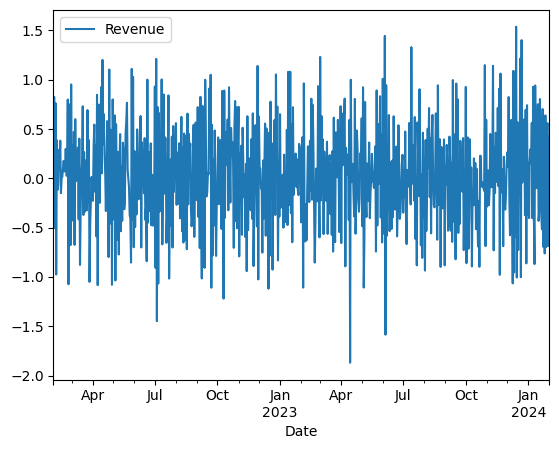

In [11]:
#plot to visually verify stationarity
churn_diff.plot()

The p-value is zero and the data set is now stationary, as verified by the adfuller dickey test, and the realization of the plot above.

In [12]:
# Split time series into a training set and a test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(churn_diff, test_size=0.2, shuffle=False, random_state=369)
train

,Revenue
Date,
2022-02-02,0.000793
2022-02-03,0.824749
2022-02-04,-0.505210
2022-02-05,0.762222
2022-02-06,-0.974900
...,...
2023-09-04,0.113264
2023-09-05,-0.531705
2023-09-06,-0.437835


In [13]:
test

,Revenue
Date,
2023-09-09,-0.531923
2023-09-10,0.157387
2023-09-11,-0.644689
2023-09-12,0.995057
2023-09-13,-0.438775
...,...
2024-01-28,0.170280
2024-01-29,0.559108
2024-01-30,-0.687028


# C5: Copy of the Prepared Dataset

With the data now split into testing and training sets, I can save each portion as its own csv as required by this particular project.

In [14]:
# Save dataframe to CSV
train.to_csv(r'C:\Users\abram\Downloads\'d213_1_train.csv')
# Save dataframe to CSV
test.to_csv(r'C:\Users\abram\Downloads\'d213_2_test.csv')

# D1: Annotated Findings & Visualizations

<b>Seasonality</b>

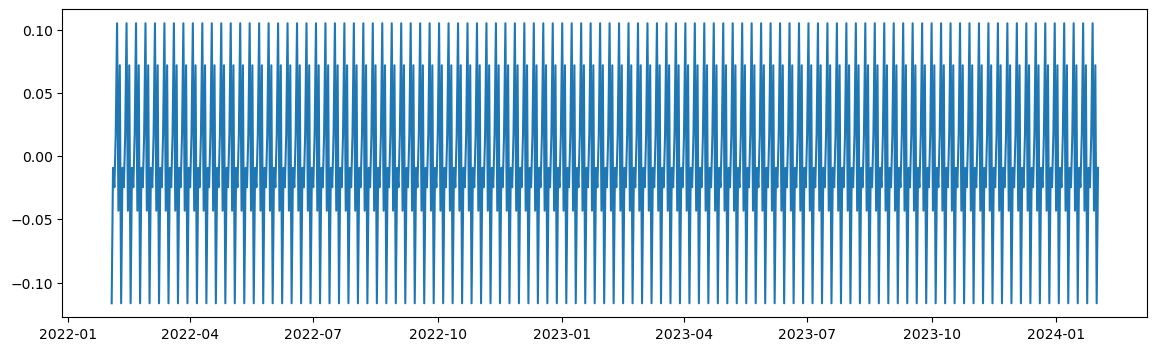

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the transformed data
decomposed_data = seasonal_decompose(churn_diff)
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [14,4])
# Plot seasonal component of the data
plt.plot(decomposed_data.seasonal)

There is a clearly defined pattern here, indicating seasonality in the transformed data set. Let's take a closer look.

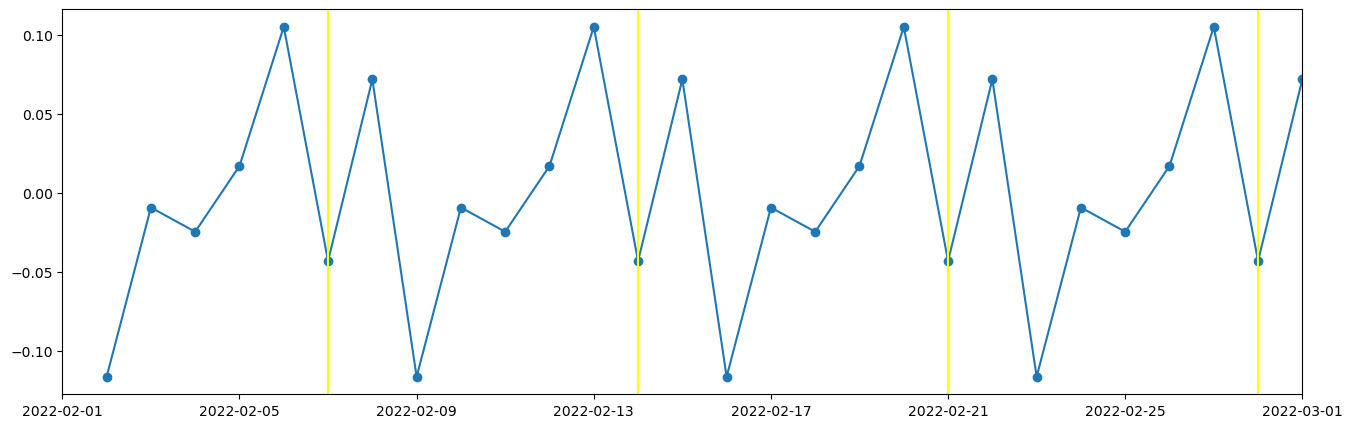

In [16]:

plt.figure(figsize = [16,5])
# Plot seasonal component of the data
plt.plot(decomposed_data.seasonal, marker='o')
plt.xlim(pd.to_datetime('2022-02-01'), pd.to_datetime('2022-03-01'))
# Draw yellow lines on Mondays
plt.axvline(x=pd.to_datetime('2022-02-07'), color='yellow')
plt.axvline(x=pd.to_datetime('2022-02-14'), color='yellow')
plt.axvline(x=pd.to_datetime('2022-02-21'), color='yellow')
plt.axvline(x=pd.to_datetime('2022-02-28'), color='yellow');

From this view, we can see a clear weekly pattern of seasonality. The yellow lines are on the Mondays of each subsequent week. It must be said, however, that according to the augmented Dickey-Fuller test on the transformed data, the p-value suggested that the data was stationary. Therefore, the impact of this seasonality, if any, is minimal on the overall dataset.

<b>Trends</b>

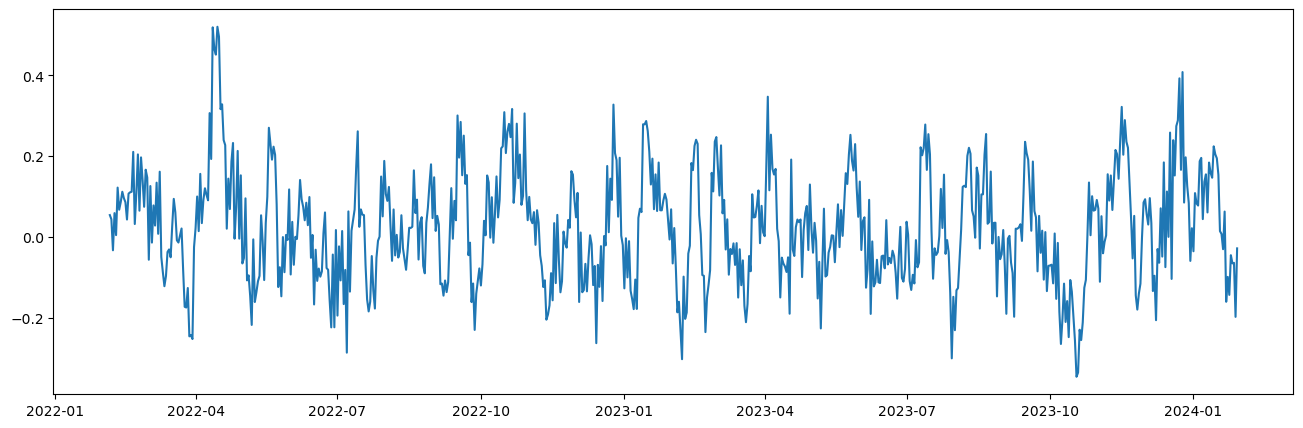

In [17]:
plt.figure(figsize = [16,5])
# Plot trend component of the data
plt.plot(decomposed_data.trend)

There is no apparent trend in this data aside from the y-value generally  staying between  -0.3 and 0.4. There does appear to be an outlier in the spring of 2022.

<b>Autocorrelation</b>

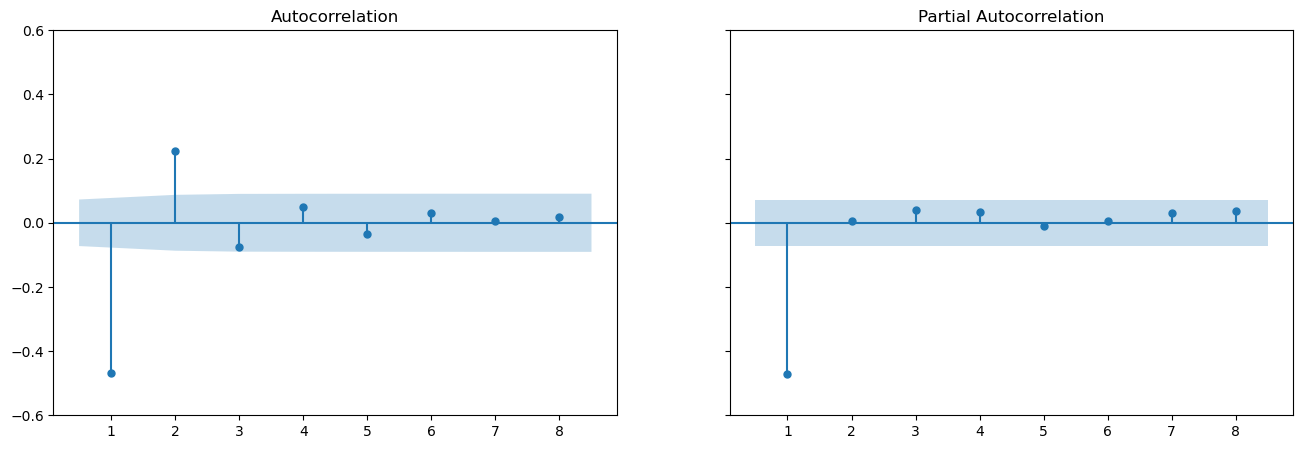

In [18]:
#Import library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)
# Plot ACF to 8 lags (only 7 days in a week), ignore zero (zero always = 1)
plot_acf(churn_diff, lags=8, zero=False, ax=ax1)
# Plot PACF to 8 lags (only 7 days in a week), ignore zero (zero always = 1)
plot_pacf(churn_diff, lags=8, zero=False,ax=ax2)
# Zoom in on y axis to see points a little more clearly
plt.ylim(-0.6, 0.6);

We can use the ACF and PACF to determine whether this data is an AR (autoregression) or MA (moving average) model. The shaded area represents statistically insignificant results. We can see that the ACF tails off at 2 and the PACF cuts off at 1. This indicates that the data is best suited to an AR(1) model.

<b>Spectral Density</b>

Below is a plot of the spectral density of the dataset.

(array([0.02187272, 0.06794442, 0.10193972, 0.03234469, 0.04559398,
        0.14815969, 0.19015645, 0.13556855, 0.17930696, 0.08735005,
        0.19447871, 0.13755823, 0.01020268, 0.09512023, 0.18805592,
        0.24517453, 0.20614533, 0.18171205, 0.06867317, 0.08851738,
        0.15697924, 0.11499682, 0.30811184, 0.14944065, 0.05001068,
        0.07531453, 0.07789058, 0.01673615, 0.21814643, 0.26177285,
        0.12608986, 0.26308319, 0.16121103, 0.04795751, 0.1613957 ,
        0.04902511, 0.26613974, 0.16274877, 0.10082987, 0.14421741,
        0.15131872, 0.10587624, 0.21235552, 0.28259121, 0.03221009,
        0.01834018, 0.04559876, 0.07659406, 0.05610271, 0.08696616,
        0.22968462, 0.1827402 , 0.09436169, 0.0237871 , 0.21783212,
        0.18875707, 0.06917957, 0.13361489, 0.06783029, 0.08269334,
        0.03112555, 0.02422832, 0.13926167, 0.39890482, 0.08670748,
        0.11441993, 0.11177872, 0.18740897, 0.12808631, 0.06475304,
        0.0077952 , 0.06857082, 0.24922119, 0.16

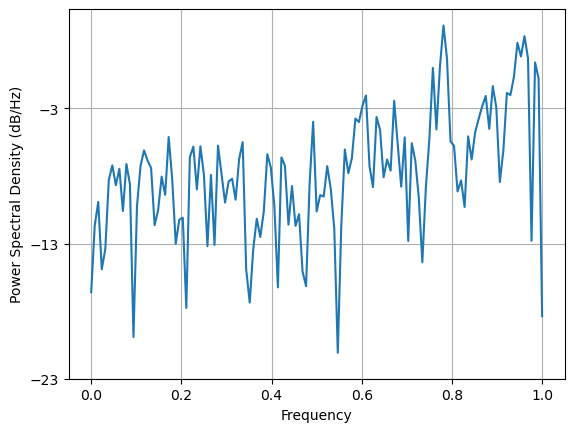

In [19]:
plt.psd(x=churn_diff.Revenue)

<b>Decomposed Time Series</b>

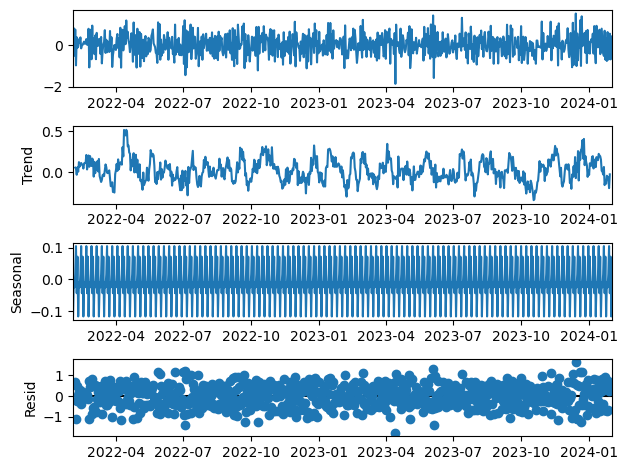

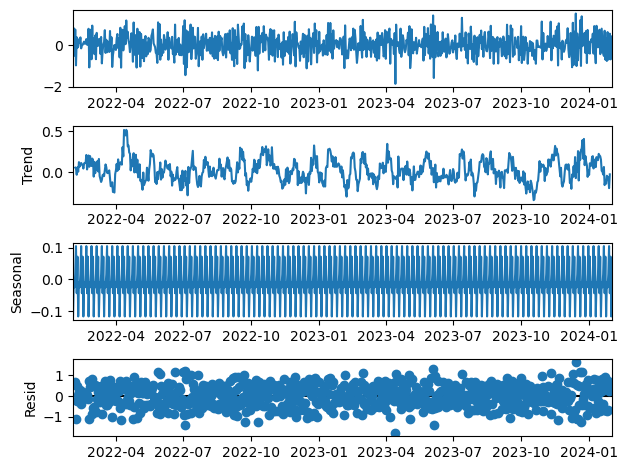

In [20]:
decomposed_data.plot()

<b>Confirmation of the lack of trends in the residuals of the decomposed series</b>

The residuals above do not appear to have any apparent trend, but let's plot a closer look for confirmation.

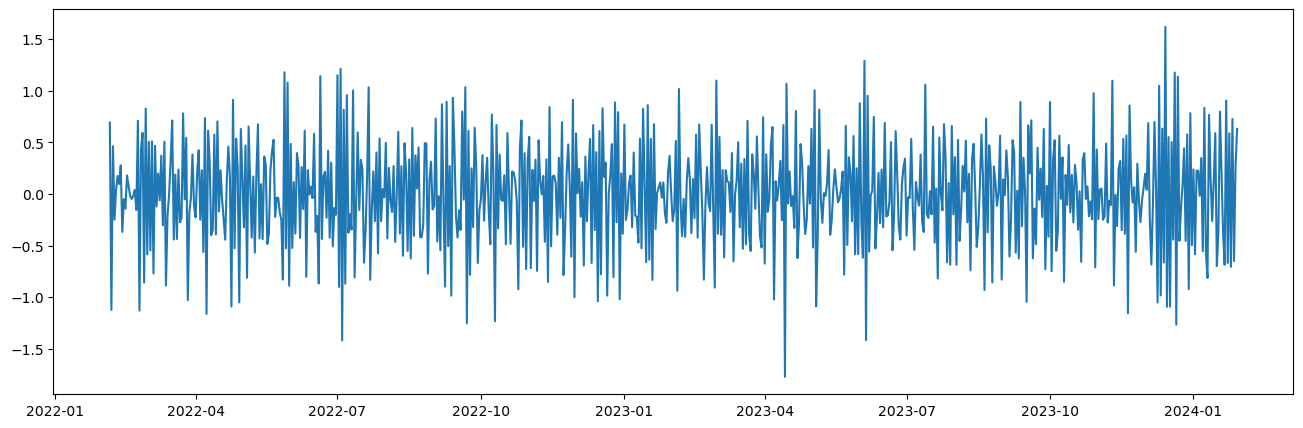

In [21]:
plt.figure(figsize = [16,5])
# Plot residual component of the data
plt.plot(decomposed_data.resid)

We can visually confirm from this plot that there is no trend in the residuals of the decomposed time series.

# D2: ARIMA Model of Time Series Data

As mentioned in part D1, due to the autocorrelation and partial autocorrelation functions, an AR(1) would best suit this time series.

In [22]:
#import library
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 0, 0), freq='D')
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -383.946
Date:                Sun, 31 Mar 2024   AIC                            773.893
Time:                        22:32:12   BIC                            787.002
Sample:                    02-02-2022   HQIC                           779.002
                         - 09-08-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0234      0.013      1.758      0.079      -0.003       0.049
ar.L1         -0.4597      0.036    -12.654      0.000      -0.531      -0.388
sigma2         0.2180      0.014     16.034      0.0

C:\Users\abram\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Based on the above calculations, the resulting ARIMA equation is:

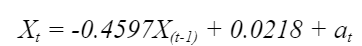

# D3: Forecast

As the testing set has 146 data points, I will attempt to forecast 146 points myself.

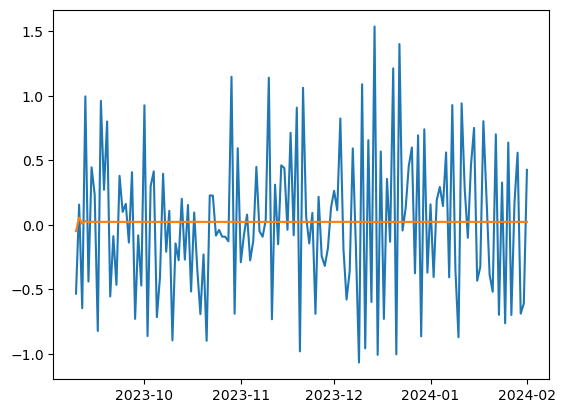

In [23]:
forecasted = results.get_prediction(start = 584, end = 729, dynamic = True)
plt.plot(test)
plt.plot(forecasted.predicted_mean)

In [24]:
print(forecasted.predicted_mean)

2023-09-09   -0.048621
2023-09-10    0.056441
2023-09-11    0.008147
2023-09-12    0.030347
2023-09-13    0.020142
                ...   
2024-01-28    0.023356
2024-01-29    0.023356
2024-01-30    0.023356
2024-01-31    0.023356
2024-02-01    0.023356
Freq: D, Name: predicted_mean, Length: 146, dtype: float64


What we have above is a representation of the predicted daily moving average of revenue of the <i>transformed</i> data set. As we took the first difference to transform the data set, we can cumulatively sum these values to find the forecasted revenue values for the original data set.

In [25]:
# Place the forecasted differences into a temporary dataframe
forecast_temp = pd.DataFrame(forecasted.predicted_mean)
# Make consistent names for dataframe for concatenation
forecast_temp.rename(columns={'predicted_mean' : 'Revenue'}, inplace=True)
# Concat a copy of Train and a copy of forecasted values)
df_w_forecast = pd.concat([train.copy(), forecast_temp.copy()])
# We've generated one DF with the differences in daily revenue for the entire 2-year period, invert the differences using cumsum
df_w_forecast = df_w_forecast.cumsum()
# Check output to verify expected values 
df_w_forecast

,Revenue
2022-02-02,0.000793
2022-02-03,0.825542
2022-02-04,0.320332
2022-02-05,1.082554
2022-02-06,0.107654
...,...
2024-01-28,16.952019
2024-01-29,16.975375
2024-01-30,16.998730
2024-01-31,17.022086


In [26]:
# Calculate confidence intervals from forecasted data
confidence_intervals = forecasted.conf_int()
# Like the forecast, these confidence limits are also differences in daily revenue, these need to be transformed back 
#to daily revenue
confidence_intervals

,lower Revenue,upper Revenue
2023-09-09,-0.963665,0.866422
2023-09-10,-0.950645,1.063528
2023-09-11,-1.017331,1.033625
2023-09-12,-0.998976,1.059669
2023-09-13,-1.009990,1.050275
...,...,...
2024-01-28,-1.006994,1.053705
2024-01-29,-1.006994,1.053705
2024-01-30,-1.006994,1.053705
2024-01-31,-1.006994,1.053705


In [27]:
# Establish a dataframe to match the confidence intervals dataframe to include the untransformed data for 9/8/2023- day 584
previous_row = pd.DataFrame({'lower Revenue': [13.50488575], 'upper Revenue' : [13.50488575], 'date' : ['2023-09-08']})
# Convert given date string to datetime and then set as index
previous_row['date'] = pd.to_datetime(previous_row['date'])
previous_row.set_index('date', inplace=True)
previous_row

,lower Revenue,upper Revenue
date,,
2023-09-08,13.504886,13.504886


In [28]:
# Concatenate the prior row and the confidence intervals data
confidence_intervals = pd.concat([previous_row, confidence_intervals])
# Un-transform the confidence intervals using cumsum()
confidence_intervals = confidence_intervals.cumsum()
# Make sure first row (data preceding the forecast) is omitted
confidence_intervals = confidence_intervals.loc['2023-09-09' : '2024-02-01']
# Verify un-transformed confidence intervals
confidence_intervals

,lower Revenue,upper Revenue
2023-09-09,12.541221,14.371307
2023-09-10,11.590576,15.434835
2023-09-11,10.573245,16.468460
2023-09-12,9.574270,17.528129
2023-09-13,8.564279,18.578404
...,...,...
2024-01-28,-129.392812,162.936970
2024-01-29,-130.399806,163.990675
2024-01-30,-131.406800,165.044381
2024-01-31,-132.413794,166.098086


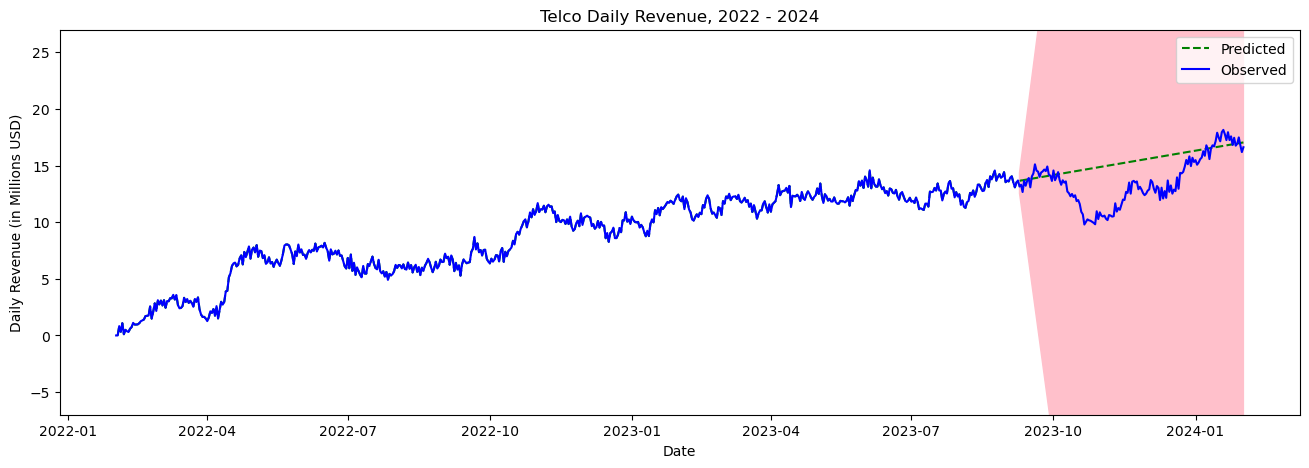

In [29]:
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Prettify the graph
plt.title("Telco Daily Revenue, 2022 - 2024")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (in Millions USD)")
# Plot the forecasted data
plt.plot(df_w_forecast, color = 'green', linestyle = 'dashed')
# Plot the original data (includes both the train set and the test set, untransformed - their actual observed values)
plt.plot(churn, color = 'blue')
# Plot the confidence intervals
plt.fill_between(confidence_intervals.index, confidence_intervals['lower Revenue'], confidence_intervals['upper Revenue'], color = 'pink')
# Keep the y-axis zoomed in, without expanding to fit the full confidence interval values
plt.ylim(-7, 27)
# Provide legend to distinguish predicted values from observed values
plt.legend(['Predicted', 'Observed'])
plt.show()

In [33]:
# Calculate root mean squared error of forecasted data against the observed data (both untransformed)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(churn.loc['2023-09-09' : '2024-02-01'], df_w_forecast.Revenue.loc['2023-09-09' : '2024-02-01'], squared=False)
print(f"The root mean squared error of this forecasting model is {round(rmse, 5)}")

The root mean squared error of this forecasting model is 2.47394


<Figure size 1600x1600 with 0 Axes>

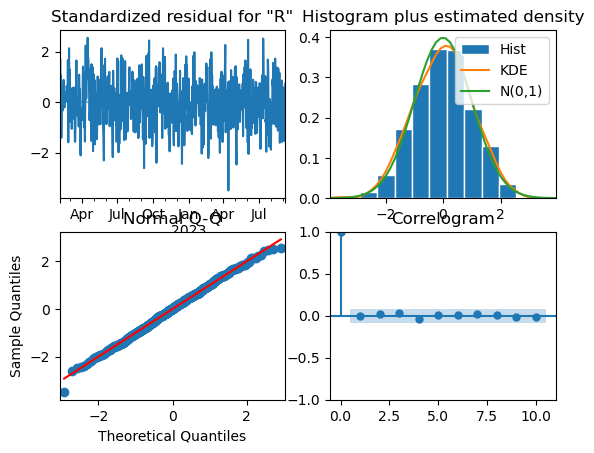

In [34]:
plt.figure(figsize = [16,16])
results.plot_diagnostics();

https://towardsdatascience.com/stationarity-assumption-in-time-series-data-67ec93d0f2f (Wu, 2021) 
https://dganais.medium.com/autocorrelation-in-time-series-c870e87e8a65 (Dotis, 2019)